# Week 7.2 PA 

In [1]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score
from plotnine import ggplot, aes, geom_bar, theme_minimal, labs, facet_wrap, geom_point
from sklearn.model_selection import GridSearchCV

In [2]:
# Read the data
ames = pd.read_csv("C:/Users/hblin/Downloads/AmesHousing.csv")

# Get rid of columns with mostly NaN values
good_cols = ames.isna().sum() < 100
ames = ames.loc[:,good_cols]

# Drop other NAs
ames = ames.dropna()

In [3]:

X = ames.drop(["SalePrice", "Order", "PID"], axis = 1)
y = ames["SalePrice"]



In [34]:
# Ridge model
ct = ColumnTransformer(
  [
    ("dummify", 
    OneHotEncoder(sparse_output = False, handle_unknown='ignore'),
    make_column_selector(dtype_include=object)),
    ("standardize", 
    StandardScaler(), 
    make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough"
).set_output(transform= "pandas")

lr_pipeline_1 = Pipeline(
  [("preprocessing", ct),
  ("ridge_regression", Ridge(alpha= 1))]
)

X_transformed = ct.fit_transform(X)

lr_pipeline_1.fit(X, y)
y_pred = lr_pipeline_1.predict(X)
r2 = r2_score(y, y_pred)
print(f"r^2: {r2}")

cross_val_r2 = cross_val_score(lr_pipeline_1, X, y, cv=5, scoring='r2').mean()
print(f"Cross Val r^2: {cross_val_r2}")

ridge_model = Ridge(alpha=1)
ridge_model.fit(X_transformed, y)
print("Intercept:", ridge_model.intercept_)
#print("Coefficients:", ridge_model.coef_)
ridge_coefs = ridge_model.coef_

r^2: 0.9157036706307324
Cross Val r^2: 0.8619316345217335
Intercept: 117771.96108762294


In [51]:
# OLS model regular linear regression
ct = ColumnTransformer(
  [
    ("dummify", 
    OneHotEncoder(sparse_output = False, handle_unknown='ignore'),
    make_column_selector(dtype_include=object)),
    ("standardize", 
    StandardScaler(), 
    make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough"
).set_output(transform= "pandas")

lr_pipeline = Pipeline(
  [("preprocessing", ct),
  ("linear_regression", LinearRegression())]
)

X_transformed = ct.fit_transform(X)



lr_pipeline.fit(X, y)
y_pred = lr_pipeline.predict(X)
r2 = r2_score(y, y_pred)
print(f"r^2: {r2}")

cross_val_r2 = cross_val_score(lr_pipeline, X, y, cv=5, scoring='r2').mean()
print(f"Cross Val r^2: {cross_val_r2}")

linear_model = LinearRegression()
linear_model.fit(X_transformed, y)
print("Intercept:", linear_model.intercept_)
#print("Coefficients:", linear_model.coef_)
linear_coefs = linear_model.coef_


r^2: 0.9209316673536342
Cross Val r^2: -1.476946805322252e+21
Intercept: 1.7205275717794195e+17


c:\Users\hblin\AppData\Local\Programs\Python\Python312\Lib\site-packages\plotnine\layer.py:364: PlotnineWarning: geom_point : Removed 229 rows containing missing values.


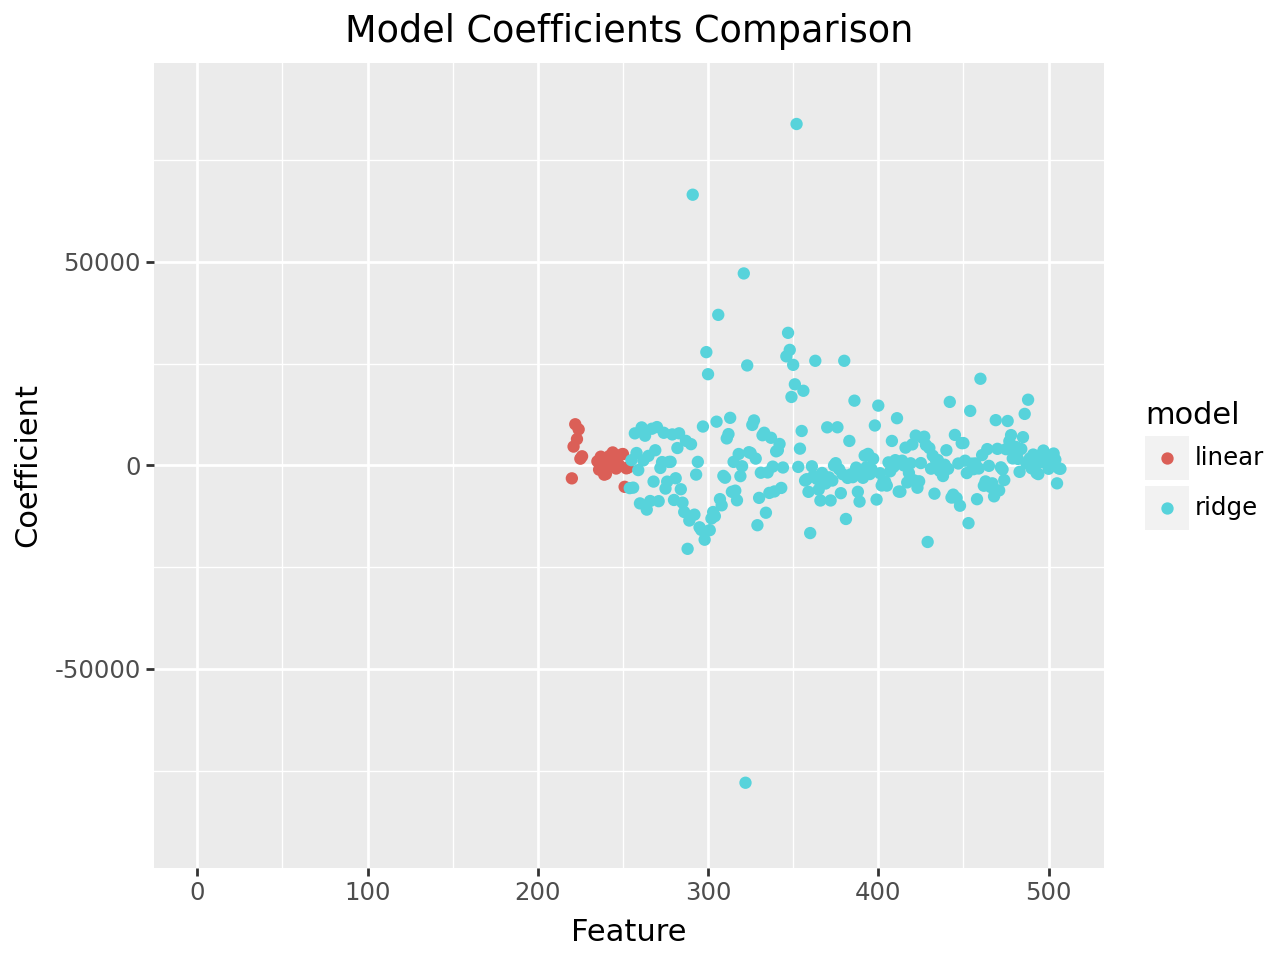

In [48]:
import numpy as np
import pandas as pd
from plotnine import *

# Assuming linear_coefs and ridge_coefs are already defined
combined_coefs = np.concatenate([linear_coefs, ridge_coefs])
model_type = ["linear"] * len(linear_coefs) + ["ridge"] * len(ridge_coefs)

# Create DataFrame and add an Index column for feature numbers
coef_df = pd.DataFrame({
    "Coefficient": combined_coefs,
    "model": model_type,
    "Index": list(range(len(combined_coefs)))  # Adds an index for each coefficient
})

(
    ggplot(coef_df, aes(x='Index', y='Coefficient', color='model')) +
    geom_point() +
    labs(title="Model Coefficients Comparison", x="Feature", y="Coefficient") + 
    scale_y_continuous(limits= (-90000, 90000))
)

Make a pipeline that uses all the variables in the Ames dataset, and then fits Ridge Regression with lambda = 1

Cross-validate this pipeline and compare the results to the ordinary linear regression.

Then fit the model on the whole dataset and get the coefficients. Make a plot of these coefficients compared to the ones from ordinary linear regression.

Using the same pipeline as previously, perform tuning on lambda

You should always try lambda values on a log scale; that is, don’t use [1,2,3,4]; instead use something like [0.001, 0.01, 0.1, 1, 10]

In [ ]:
# tuning ridge alpha 
ct = ColumnTransformer(
  [
    ("dummify", 
    OneHotEncoder(sparse_output = False, handle_unknown='ignore'),
    make_column_selector(dtype_include=object)),
    ("standardize", 
    StandardScaler(), 
    make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough"
).set_output(transform= "pandas")

lr_pipeline_1 = Pipeline(
  [("preprocessing", ct),
  ("ridge_regression", Ridge())]
)

X_transformed = ct.fit_transform(X)

param_grid = {"ridge_regression__alpha": [0.001, 0.01, 0.1, 1, 10]}
grid_search = GridSearchCV(lr_pipeline_1, param_grid, cv=5, scoring="r2")
grid_search.fit(X,y)

best_alpha = grid_search.best_params_["ridge_regression__alpha"]
best_r2 = grid_search.best_score_
print(f"Best alpha: {best_alpha}")
print(f"Best Cross-Validated r^2: {best_r2}")

# Display the cross-validated r^2 scores for each alpha
results = pd.DataFrame(grid_search.cv_results_)
alpha_scores = results[["param_ridge_regression__alpha", "mean_test_score"]]

print(alpha_scores)

# lr_pipeline_1.fit(X, y)
# y_pred = lr_pipeline_1.predict(X)
# r2 = r2_score(y, y_pred)
# print(f"r^2: {r2}")

# cross_val_r2 = cross_val_score(lr_pipeline_1, X, y, cv=5, scoring='r2').mean()
# print(f"Cross Val r^2: {cross_val_r2}")

Best alpha: 10
Best Cross-Validated r^2: 0.8642722110166747
   param_ridge_regression__alpha  mean_test_score
0                          0.001         0.853920
1                          0.010         0.854186
2                          0.100         0.856302
3                          1.000         0.861932
4                         10.000         0.864272


Create a LASSO pipeline, and tune lambda

Fit your best model on the full Ames data, and compare the coefficients to Ridge and OLS

In [ ]:
ct = ColumnTransformer(
  [
    ("dummify", 
    OneHotEncoder(sparse_output = False, handle_unknown='ignore'),
    make_column_selector(dtype_include=object)),
    ("standardize", 
    StandardScaler(), 
    make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough"
).set_output(transform= "pandas")

lr_pipeline_2 = Pipeline(
  [("preprocessing", ct),
  ("lasso_regression", Lasso(tol=1e-2))]
)

param_grid = {"lasso_regression__alpha": [1, 10, 100]}
grid_search = GridSearchCV(lr_pipeline_2, param_grid, cv=5, scoring="r2")
grid_search.fit(X,y)

best_alpha = grid_search.best_params_["lasso_regression__alpha"]
best_r2 = grid_search.best_score_
print(f"Best alpha: {best_alpha}")
print(f"Best Cross-Validated r^2: {best_r2}")

# Display the cross-validated r^2 scores for each alpha
results = pd.DataFrame(grid_search.cv_results_)
alpha_scores = results[["param_lasso_regression__alpha", "mean_test_score"]]

#print(alpha_scores)

lasso_model = Ridge(alpha=1)
lasso_model.fit(X_transformed, y)
print("Intercept:", lasso_model.intercept_)
#print("Coefficients:", lasso_model.coef_)

Best alpha: 100
Best Cross-Validated r^2: 0.8669808246748015
   param_lasso_regression__alpha  mean_test_score
0                              1         0.857185
1                             10         0.860737
2                            100         0.866981


The best alpha is 100. For these models, it kept telling me that for the lower values of alpha something did not converge and was taking over 10 minutes to run so I removed those lower values. 

In [29]:
# OLS model
ct = ColumnTransformer(
  [
    ("dummify", 
    OneHotEncoder(sparse_output = False, handle_unknown='ignore'),
    make_column_selector(dtype_include=object)),
    ("standardize", 
    StandardScaler(), 
    make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough"
).set_output(transform= "pandas")

lr_pipeline = Pipeline(
  [("preprocessing", ct),
  ("linear_regression", LinearRegression())]
)
ols_model = lr_pipeline.fit(X, y)
#print("Coefficients:", ols_model.named_steps['ols_regression'].coef_)

In [30]:
# Best Ridge model 
ct = ColumnTransformer(
  [
    ("dummify", 
    OneHotEncoder(sparse_output = False, handle_unknown='ignore'),
    make_column_selector(dtype_include=object)),
    ("standardize", 
    StandardScaler(), 
    make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough"
).set_output(transform= "pandas")

lr_pipeline_1 = Pipeline(
  [("preprocessing", ct),
  ("ridge_regression", Ridge(alpha = 10))]
)
ridge_model = lr_pipeline_1.fit(X,y)
#print("Coefficients:", ridge_model.named_steps['ridge_regression'].coef_)

In [53]:
# Best Lasso Model
ct = ColumnTransformer(
    [
        ("dummify", 
         OneHotEncoder(sparse_output=False, handle_unknown='ignore'),
         make_column_selector(dtype_include=object)),
        ("standardize", 
         StandardScaler(), 
         make_column_selector(dtype_include=np.number))
    ],
    remainder="passthrough"
).set_output(transform="pandas")

lr_pipeline_2 = Pipeline(
    [
        ("preprocessing", ct),
        ("lasso_regression", Lasso(alpha=100, tol=1e-2))
    ]
)

# Fit the pipeline directly on X and y
lasso_model = lr_pipeline_2.fit(X, y)

# Access the coefficients of the fitted model
#print("Coefficients:", lasso_model.named_steps['lasso_regression'].coef_)
lasso_coefs = lasso_model.named_steps['lasso_regression'].coef_

c:\Users\hblin\AppData\Local\Programs\Python\Python312\Lib\site-packages\plotnine\layer.py:364: PlotnineWarning: geom_point : Removed 230 rows containing missing values.


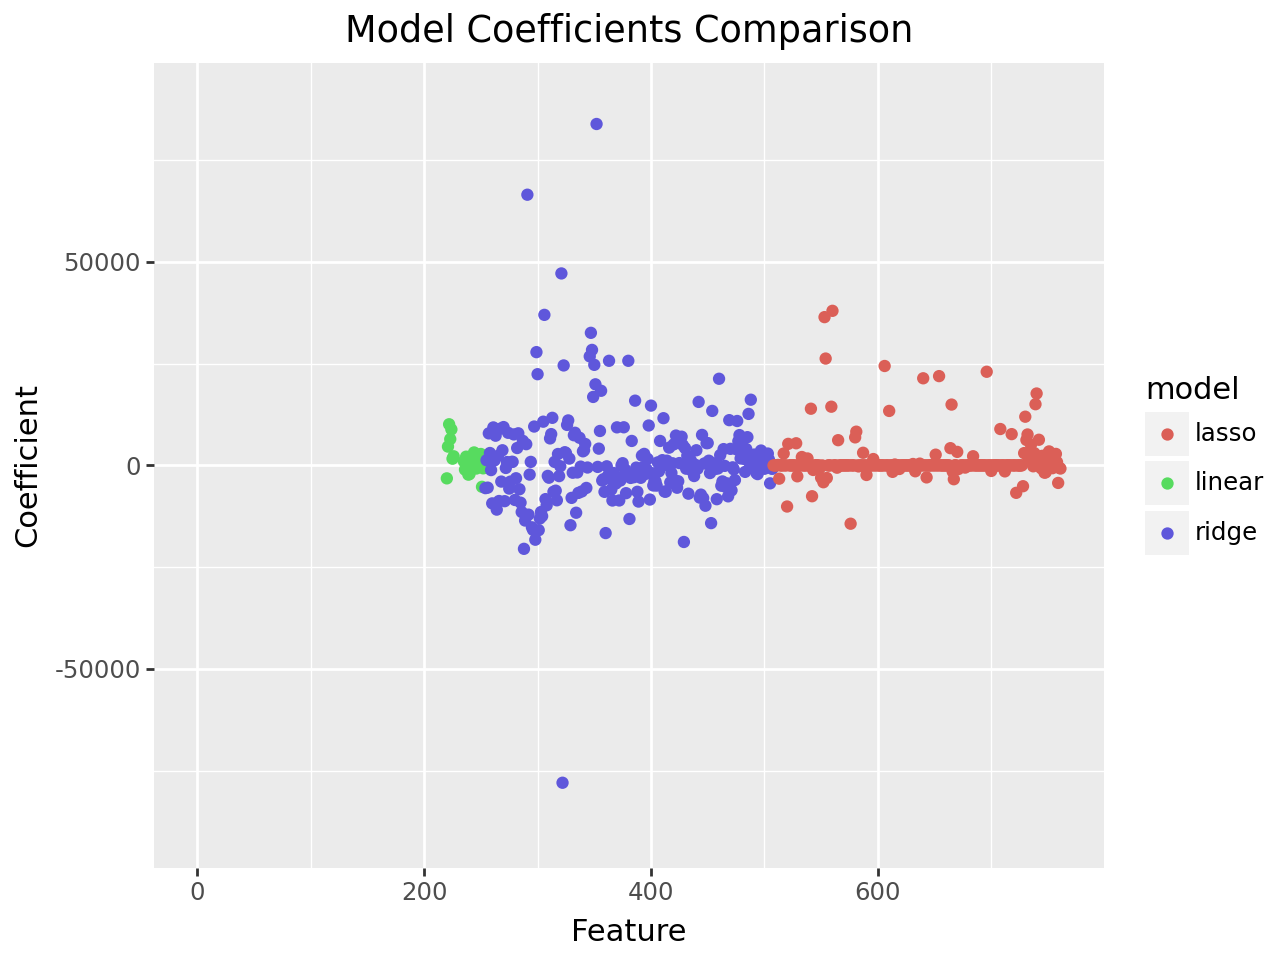

In [54]:
combined_coefs = np.concatenate([linear_coefs, ridge_coefs, lasso_coefs])
model_type = ["linear"] * len(linear_coefs) + ["ridge"] * len(ridge_coefs) + ["lasso"] * len(lasso_coefs)

# Create DataFrame and add an Index column for feature numbers
coef_df = pd.DataFrame({
    "Coefficient": combined_coefs,
    "model": model_type,
    "Index": list(range(len(combined_coefs)))  # Adds an index for each coefficient
})

(
    ggplot(coef_df, aes(x='Index', y='Coefficient', color='model')) +
    geom_point() +
    labs(title="Model Coefficients Comparison", x="Feature", y="Coefficient") + 
    scale_y_continuous(limits= (-90000, 90000))
)

The OLS model had such big coefs that it did not fit within the scale of the plot for most of them. As the models progressed, we see the coefficients getting smaller and smaller as the type of model penalizes them more and more. 

Create an Elastic Net pipeline, and tune lambda and alpha

Fit your best model on the full Ames data, and compare the coefficients to Ridge and OLS.

In [59]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import ElasticNet
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_selector

ct = ColumnTransformer(
    [
        ("dummify", 
         OneHotEncoder(sparse_output=False, handle_unknown='ignore'),
         make_column_selector(dtype_include=object)),
        ("standardize", 
         StandardScaler(), 
         make_column_selector(dtype_include=np.number))
    ],
    remainder="passthrough"
).set_output(transform="pandas")

# Update the pipeline to use ElasticNet instead of Lasso
lr_pipeline_2 = Pipeline(
    [
        ("preprocessing", ct),
        ("elasticnet_regression", ElasticNet(alpha=100, l1_ratio=0.5, tol=1e-2))  # Set l1_ratio to control the balance between L1 and L2 regularization
    ]
)

# Fit the pipeline directly on X and y
elasticnet_model = lr_pipeline_2.fit(X, y)

# Access the coefficients of the fitted ElasticNet model
elasticnet_coefs = elasticnet_model.named_steps['elasticnet_regression'].coef_

# Print coefficients to verify
#print("Coefficients:", elasticnet_coefs)


# Define the parameter grid
param_grid = {
    "elasticnet_regression__alpha": [1, 10, 100],  # Test a range of alpha values
    "elasticnet_regression__l1_ratio": [0.1, 0.5, 0.7, 0.9, 1]  # Test different L1 ratios
}

# Set up GridSearchCV with the pipeline and parameter grid
grid_search = GridSearchCV(lr_pipeline_2, param_grid, cv=5, scoring="r2")

# Fit the model on the training data
grid_search.fit(X, y)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best parameters:", best_params)
print("Best negative r2:", best_score)

# Access the best model's coefficients
best_model = grid_search.best_estimator_
elasticnet_coefs = best_model.named_steps['elasticnet_regression'].coef_
#print("Coefficients of the best model:", elasticnet_coefs)



Best parameters: {'elasticnet_regression__alpha': 100, 'elasticnet_regression__l1_ratio': 1}
Best negative r2: 0.8669808246748015


In [61]:
ct = ColumnTransformer(
    [
        ("dummify", 
         OneHotEncoder(sparse_output=False, handle_unknown='ignore'),
         make_column_selector(dtype_include=object)),
        ("standardize", 
         StandardScaler(), 
         make_column_selector(dtype_include=np.number))
    ],
    remainder="passthrough"
).set_output(transform="pandas")

# Update the pipeline to use ElasticNet instead of Lasso
lr_pipeline_2 = Pipeline(
    [
        ("preprocessing", ct),
        ("elasticnet_regression", ElasticNet(alpha=100, l1_ratio=1, tol=1e-2))  # Set l1_ratio to control the balance between L1 and L2 regularization
    ]
)
elasticnet_model = lr_pipeline_2.fit(X, y)

# Access the coefficients of the fitted ElasticNet model
elasticnet_coefs = elasticnet_model.named_steps['elasticnet_regression'].coef_

c:\Users\hblin\AppData\Local\Programs\Python\Python312\Lib\site-packages\plotnine\layer.py:364: PlotnineWarning: geom_point : Removed 231 rows containing missing values.


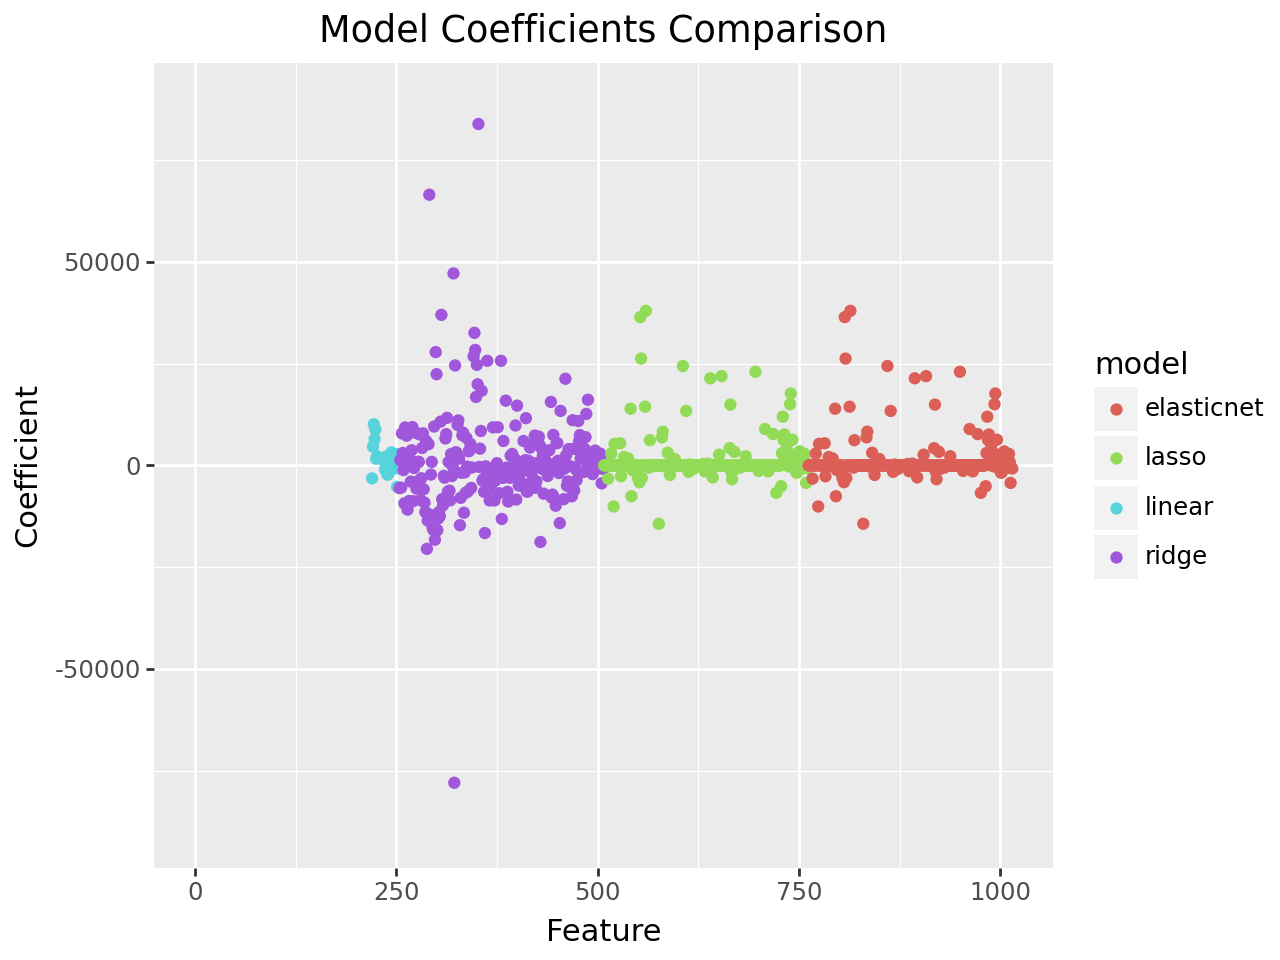

: 

In [ ]:
combined_coefs = np.concatenate([linear_coefs, ridge_coefs, lasso_coefs, elasticnet_coefs])
model_type = ["linear"] * len(linear_coefs) + ["ridge"] * len(ridge_coefs) + ["lasso"] * len(lasso_coefs) + ["elasticnet"] * len(elasticnet_coefs)

# Create DataFrame and add an Index column for feature numbers
coef_df = pd.DataFrame({
    "Coefficient": combined_coefs,
    "model": model_type,
    "Index": list(range(len(combined_coefs)))  # Adds an index for each coefficient
})

(
    ggplot(coef_df, aes(x='Index', y='Coefficient', color='model')) +
    geom_point() +
    labs(title="Model Coefficients Comparison", x="Feature", y="Coefficient") + 
    scale_y_continuous(limits= (-90000, 90000))
)

It seems the lasso model and elastic net model are the same because have the same coefficients. We can also see this by using the elastic net tuning model of L1 =1. This means the lasso model was the preferred model and not somewhere in between ridge and lasso. this is most likely because there were so many coefficients that needed to be accounted for in the model that making some of them 0 is optimal. 